In [125]:
import xarray as xr; import pandas as pd; import numpy as np
from pylab import rcParams
%pylab inline


import cmocean.cm as cmo
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
rc('ytick.major', size=0)
rc('xtick.major', size=0)
rc('ytick.minor', size=2)
rc('xtick.minor', size=2)
rc('lines', linewidth=2)
# rc('axes', labelsize=18, edgecolor='0.85', linewidth=1)
rc('font', size=18)

plt.rcParams['figure.figsize'] = (18,9)
plt.rcParams['font.size'] = 18

rcParams['xtick.major.pad']='8'
rcParams['ytick.major.pad']='8'

Populating the interactive namespace from numpy and matplotlib


In [2]:
seaice = xr.open_mfdataset('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/seaice/asi*.hdf', 
                          concat_dim=pd.date_range(start='2018-01-01', end='2019-03-31', freq='D'))

seaice_lnlt = xr.open_dataset('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/seaice/LongitudeLatitudeGrid-s6250-Antarctic.hdf')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
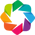

In [3]:
import xarray as xr
import cartopy.crs as ccrs
import geoviews as gv

gv.extension('bokeh')
gv.output(fig='png', size=300)

In [4]:
seaice = seaice.rename({'concat_dim': 'time', 'ASI Ice Concentration': 'si_conc'})
seaice = seaice.assign_coords(lon=(["x", "y"], np.array(seaice_lnlt.Longitudes)))
seaice = seaice.assign_coords(lat=(["x", "y"], np.array(seaice_lnlt.Latitudes)))
seaice = seaice.assign(si=(["time", "x", "y"], seaice.si_conc.values))

In [5]:
seaice = seaice.drop('si_conc')

In [6]:
seaice_mnth = seaice.resample(time='1M').mean()

/Users/marcel/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [88]:
# seaice_subset = seaice.sel(time=slice('2018-12-05', '2018-12-15'))

Interpolation

In [12]:
from scipy.interpolate import griddata as g
from tqdm import tqdm_notebook

X = np.arange(-60, 60.25, 0.25)
Y = np.arange(-80, -49.75, 0.25)

x, y = np.meshgrid(X,Y)

sic_new = np.ndarray([len(seaice_mnth.si), len(Y), len(X)])

x_, y_ = np.ravel(seaice_mnth.lon), np.ravel(seaice_mnth.lat)
x_[x_>180] = x_[x_>180]-360

for i in tqdm.tqdm_notebook(range(len(seaice_mnth.si))):
 
    si = np.ravel(seaice_mnth.si[i, :, :].values)
    sic_new[i, :, :] = g((y_, x_), si, (y, x), method='linear')
       
sic_new[sic_new==0] = np.NaN
sic_new = np.ma.masked_invalid(sic_new)


/Users/marcel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [13]:
sic = xr.Dataset(data_vars={'sic' : (('time', 'lat', 'lon'), sic_new)},
                 coords={'time' : seaice_mnth.time, 
                         'lat'  : Y, 
                         'lon'  : X})

In [14]:
sic

<xarray.Dataset>
Dimensions:  (lat: 121, lon: 481, time: 15)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-31 2018-02-28 ... 2019-03-31
  * lat      (lat) float64 -80.0 -79.75 -79.5 -79.25 ... -50.5 -50.25 -50.0
  * lon      (lon) float64 -60.0 -59.75 -59.5 -59.25 ... 59.25 59.5 59.75 60.0
Data variables:
    sic      (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

In [143]:
gvds = gv.Dataset(sic.sic)
gvds

:Dataset   [time,lat,lon]   (sic)

In [144]:
import cmocean.cm as cmo

In [145]:
tiles = gv.tile_sources.Wikipedia
quadmeshes = gv.Dataset(sic.sic).to(gv.QuadMesh, ['lon', 'lat'], dynamic=True).opts(cmap=cmo.ice)

In [146]:
tiles * quadmeshes

:DynamicMap   [time]
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .QuadMesh.I :QuadMesh   [lon,lat]   (sic)

### Cartopy maps

In [15]:
adt = xr.open_mfdataset('/Users/marcel/Google Drive/Projects/buoyancy_flux_paper/data/adt/nrt*.nc')

In [16]:
adt_lon  = np.concatenate([adt.longitude.values[180:]-360, adt.longitude.values[:180]])
adt_lat  = adt.latitude.values
adt_time = adt.time.values

ugeo = np.concatenate([adt.ugos[:, :, 180:], adt.ugos[:, :, :180]], axis=2) # units of mm/s
vgeo = np.concatenate([adt.vgos[:, :, 180:], adt.vgos[:, :, :180]], axis=2) # units of mm/s

In [17]:
geo = xr.Dataset(data_vars={'vgeo': (('time', 'lat', 'lon'), vgeo),
                            'ugeo': (('time', 'lat', 'lon'), ugeo),},
                 coords={'time' : adt_time, 
                         'lat'  : adt_lat, 
                         'lon'  : adt_lon})

In [23]:
geo = geo.sel(lat=slice(-90, -30), lon=slice(-20, 40))

In [24]:
vel = np.sqrt(geo.ugeo**2 + geo.vgeo**2)
eke = np.abs(np.nanmean(vel) - vel)

In [25]:
mean_eke = np.mean(eke, axis=0)

In [57]:
mean_ugeo = np.nanmean(geo.ugeo, axis=0)
mean_vgeo = np.nanmean(geo.vgeo, axis=0)

/Users/marcel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/marcel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


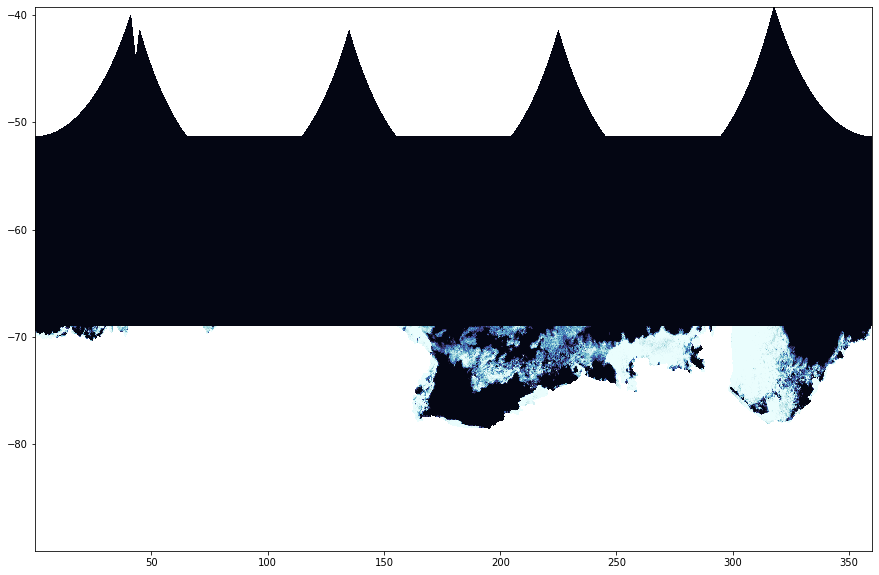

In [79]:
plt.pcolormesh(seaice.lon, seaice.lat, seaice.si[8], cmap=cmo.ice)


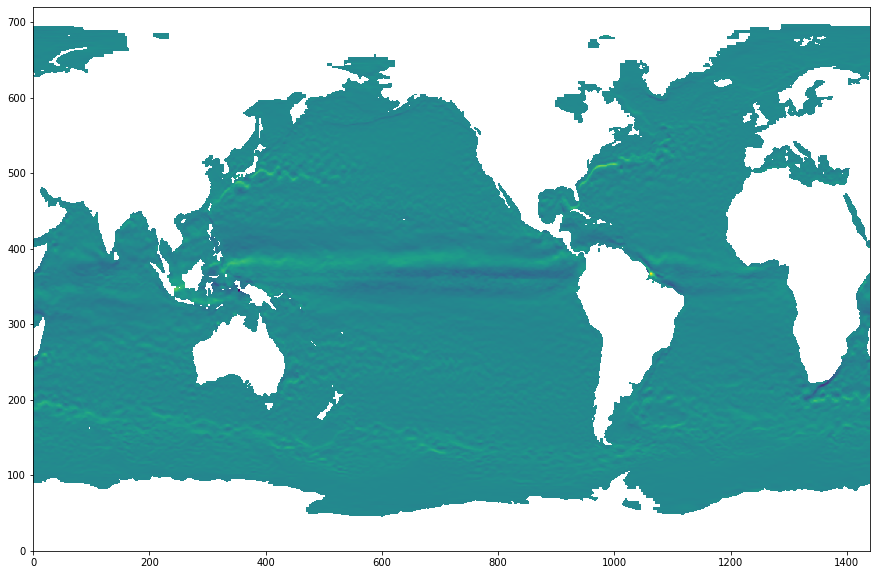

In [56]:
plt.pcolormesh(mean_ugeo)

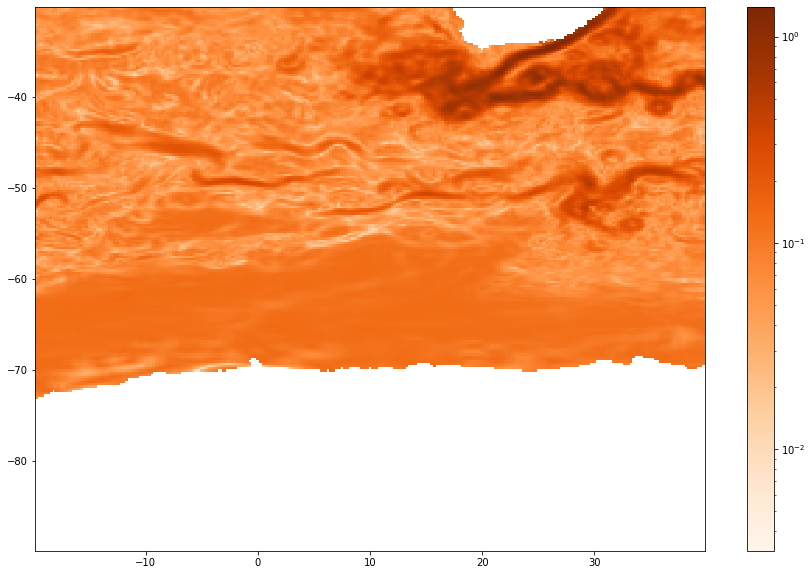

In [34]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt

plt.pcolormesh(geo.lon, geo.lat, mean_eke, cmap='Oranges', norm=colors.LogNorm(vmin=np.nanmin(mean_eke), vmax=np.nanmax(mean_eke)))
plt.colorbar()

In [51]:
geo.lon[::i]

<xarray.DataArray 'lon' (lon: 48)>
array([-19.875, -18.625, -17.375, -16.125, -14.875, -13.625, -12.375, -11.125,
        -9.875,  -8.625,  -7.375,  -6.125,  -4.875,  -3.625,  -2.375,  -1.125,
         0.125,   1.375,   2.625,   3.875,   5.125,   6.375,   7.625,   8.875,
        10.125,  11.375,  12.625,  13.875,  15.125,  16.375,  17.625,  18.875,
        20.125,  21.375,  22.625,  23.875,  25.125,  26.375,  27.625,  28.875,
        30.125,  31.375,  32.625,  33.875,  35.125,  36.375,  37.625,  38.875],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 -19.875 -18.625 -17.375 ... 36.375 37.625 38.875

In [52]:
mean_ugeo.shape

(720, 1440)

In [115]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

/Users/marcel/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


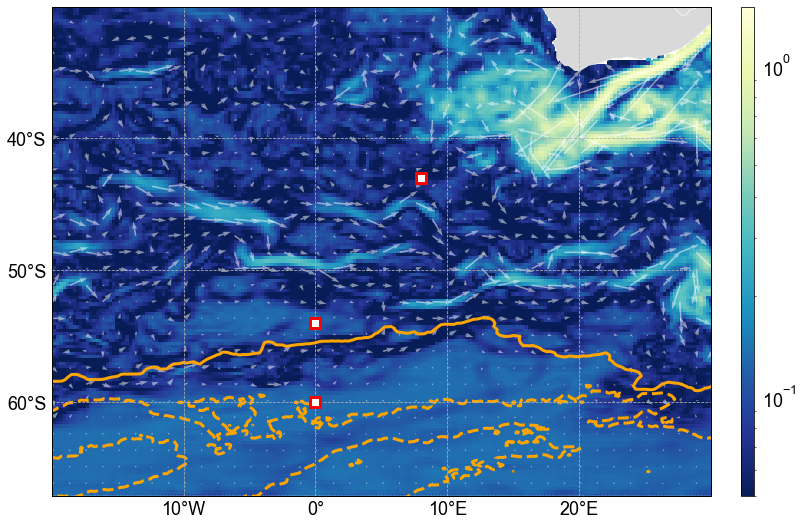

In [136]:
fig = plt.Figure()
fig.set_canvas(plt.gcf().canvas)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, linewidth=0.5, edgecolor='white')

im = ax.pcolormesh(geo.lon, geo.lat, mean_eke, cmap='YlGnBu_r', 
              norm=colors.LogNorm(vmin=0.5e-1, vmax=1.5),
              transform = ccrs.PlateCarree())

plt.colorbar(mappable=im, ax=ax, aspect=40, pad=0.03)

gl=ax.gridlines(linestyle='--', draw_labels=True)
gl.xlocator = mticker.FixedLocator(np.arange(-20, 40, 10))
gl.ylocator = mticker.FixedLocator(np.arange(-70, -20, 10))
gl.xlabels_top = False; gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER

ax.set_extent([-20, 30, -65, -30])

i=5

ax.quiver(geo.lon[::i], geo.lat[::i], mean_ugeo[::i, ::i], mean_vgeo[::i, ::i], 
          transform = ccrs.PlateCarree(), color='w', alpha=0.5)

# ax.pcolormesh(sic.lon, sic.lat, sic.sic[8], cmap=cmo.ice, transform = ccrs.PlateCarree())
ax.contour(sic.lon, sic.lat, sic.sic[8], levels=[15], colors='orange', transform = ccrs.PlateCarree(), linewidths=3)
ax.contour(sic.lon, sic.lat, sic.sic[11], levels=[15], colors='orange', linestyles='--', transform = ccrs.PlateCarree(), linewidths=3)

plt.plot([0, 0, 8], [-60, -54, -43], '-s', color='k',
         markersize=10, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='r',
         markeredgewidth=3, transform=ccrs.PlateCarree())

# countries and coastlines
shpf = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')

reader = shpreader.Reader(shpf)
countries = reader.records()

for country in countries:
    ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor='0.85', linewidth=0.5, edgecolor='white')